# Comparison on PSD between various configurations 
## Objective: improving EMI/EMC
Data taken on Feb 18th 2019 by MP, FV and ST - Code by JCH

In [46]:
%matplotlib notebook
from matplotlib import rc
rc('figure',figsize=(8,5))
rc('font',size=12)
rc('text',usetex=False)

import fibtools as ft
import plotters as p
from qubicpack import qubicpack as qp

import numpy as np
from matplotlib.pyplot import *
import matplotlib.mlab as mlab
import scipy.ndimage.filters as f
import glob
import string

Get the names of the directories that were created during this session:

In [47]:
init_dir = '/Users/hamilton/Qubic/Grounding/2019-02-18'
dirs = glob.glob(init_dir+'/*')
for d in dirs: print d

/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_OFF_DIODES_ON
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.31.34__spectre5_AVS47_1_2_OFF_DIODES_A_B_OFF
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AVS47_1_2_OFF_DIODES_ON
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.45.15__spectre7_AVS47_1_2_OFF_DIODES_A_B_OFF_MMR3_MGC3_ON
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.29.06__spectre4_AVS47_1_2_OFF_DIODES_A_OFF
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.35.10__spectre6_AVS47_1_2_ON_DIODES_A_B_OFF
/Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.19.26__spectre1_AVS47_DIODES_ON


Get the last part of the string in order to have proper label for each file:

In [48]:
lab = []
for d in dirs:
    bla = 'spectre'+str.split(d,'spectre')[1]
    print bla
    lab.append(bla)

spectre2_AVS47_2_OFF_DIODES_ON
spectre5_AVS47_1_2_OFF_DIODES_A_B_OFF
spectre3_AVS47_1_2_OFF_DIODES_ON
spectre7_AVS47_1_2_OFF_DIODES_A_B_OFF_MMR3_MGC3_ON
spectre4_AVS47_1_2_OFF_DIODES_A_OFF
spectre6_AVS47_1_2_ON_DIODES_A_B_OFF
spectre1_AVS47_DIODES_ON


Select a TES and plot the spectra:

In [49]:
allspecs = []
allfreqs = []
medspec = []
for i in xrange(len(dirs)):
    print(i)
    a1 = qp()
    a1.read_qubicstudio_dataset(dirs[i], asic=1)
    a2 = qp()
    a2.read_qubicstudio_dataset(dirs[i], asic=2)
    nsamples = len(a1.timeline(TES=7))
    pow2 = int(np.log(nsamples)/np.log(2))
    ns = 2**pow2
    FREQ_SAMPLING = 1./a1.sample_period()
    print(nsamples)
    
    specs = np.zeros((256, ns/2+1))
    for j in xrange(128):
        spectrum, freq = mlab.psd(a1.timeline(TES=j+1)[:ns], Fs=FREQ_SAMPLING, NFFT=ns, window=mlab.window_hanning)
        specs[j,:] = spectrum
        spectrum, freq = mlab.psd(a2.timeline(TES=j+1)[:ns], Fs=FREQ_SAMPLING, NFFT=ns, window=mlab.window_hanning)
        specs[j+128,:] = spectrum
    allspecs.append(specs)
    allfreqs.append(freq)
    medspec.append(np.median(specs,axis=0))

0
WARNING! Cannot find translation table file: /Users/hamilton/Python/GitQubicMousset/qubic/qubic/scripts/Calibration/TES_translation_table.pickle
Open loop and Room Temperature tests will not be noted in plots etc.
Reading data for ASIC 1
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_OFF_DIODES_ON/Sums/science-asic1-2019.02.18.172239.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_OFF_DIODES_ON/Sums/science-asic1-2019.02.18.172239.fits
Guessing the detector array is: P87
No hkintern data found in directory: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_OFF_DIODES_ON/Hks
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_OFF_DIODES_ON/Hks/conf-asics-2019.02.18.172242.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.22.39__spectre2_AVS47_2_

WARNING! Cannot find translation table file: /Users/hamilton/Python/GitQubicMousset/qubic/qubic/scripts/Calibration/TES_translation_table.pickle
Open loop and Room Temperature tests will not be noted in plots etc.
Reading data for ASIC 2
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AVS47_1_2_OFF_DIODES_ON/Sums/science-asic2-2019.02.18.172512.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AVS47_1_2_OFF_DIODES_ON/Sums/science-asic2-2019.02.18.172512.fits
Guessing the detector array is: P87
No hkintern data found in directory: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AVS47_1_2_OFF_DIODES_ON/Hks
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AVS47_1_2_OFF_DIODES_ON/Hks/conf-asics-2019.02.18.172514.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.25.12__spectre3_AV

5
WARNING! Cannot find translation table file: /Users/hamilton/Python/GitQubicMousset/qubic/qubic/scripts/Calibration/TES_translation_table.pickle
Open loop and Room Temperature tests will not be noted in plots etc.
Reading data for ASIC 1
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.35.10__spectre6_AVS47_1_2_ON_DIODES_A_B_OFF/Sums/science-asic1-2019.02.18.173510.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.35.10__spectre6_AVS47_1_2_ON_DIODES_A_B_OFF/Sums/science-asic1-2019.02.18.173510.fits
Guessing the detector array is: P87
No hkintern data found in directory: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.35.10__spectre6_AVS47_1_2_ON_DIODES_A_B_OFF/Hks
reading fits file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.35.10__spectre6_AVS47_1_2_ON_DIODES_A_B_OFF/Hks/conf-asics-2019.02.18.173513.fits
Reading QubicStudio FITS file: /Users/hamilton/Qubic/Grounding/2019-02-18/2019-02-18_17.

Now displaying the TES Spectra in the various configurations. If `median=False` the TES whose number is given by `theTES` will be plotted, instead the median of all TES will be plotted.

The spectra are smoothed by a gaussian of widh `filt`. Values like 10 or more are useful for looking at high frequency while smaller values are better at low frequency.

There will be as many plots as there are elements in `minfreq`, `maxfreq` and `filt`


<IPython.core.display.Javascript object>


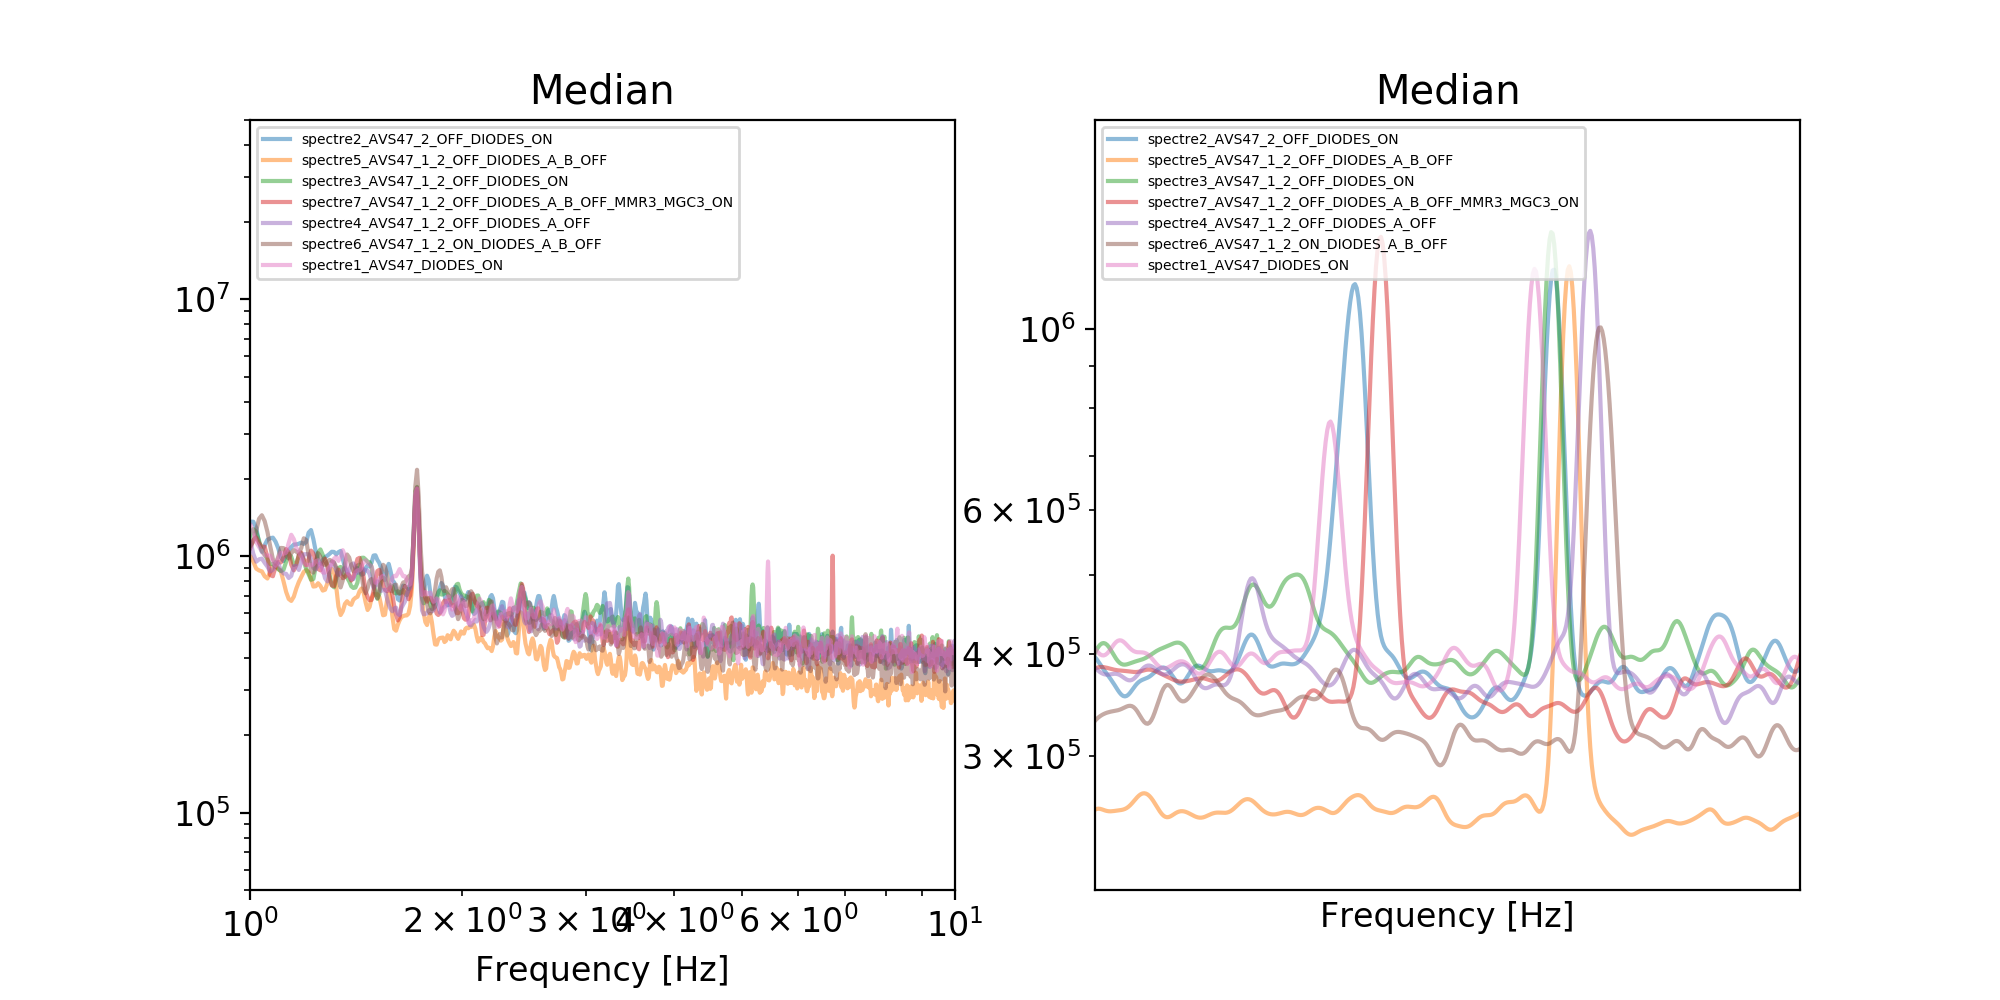

In [65]:
rc('figure',figsize=(10,5))
theTES = 96
median=True

minfreq = [1., 10.]
maxfreq = [10., FREQ_SAMPLING/2]
filt = [1,5]

clf()
for j in xrange(len(allspecs)):
    for k in xrange(len(minfreq)):
        subplot(1,len(minfreq),k+1)
        xscale('log')
        yscale('log')
        xlim(minfreq[k], maxfreq[k])
        ylim(5e4, 5e7)
        if median:
            toplot = medspec[j]
        else:
            toplot = allspecs[j][theTES,:]
        plot(allfreqs[j], f.gaussian_filter1d(toplot,filt[k]), label=lab[j], alpha=0.5)
        legend(loc='upper left', fontsize=5)
        xlabel('Frequency [Hz]')
        if j==0: 
            if median:
                title('Median')
            else:
                title('TES={}'.format(theTES))
            
        
show()